<a href="https://colab.research.google.com/github/Wilson30678tw/Computer-Vision-Project/blob/main/Modify_FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/IAT360/FaceDetectionDataset/images'

data_yaml = f"""
train: {base_dir}/train
val: {base_dir}val

nc: 1
names: ['face']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

Mounted at /content/drive


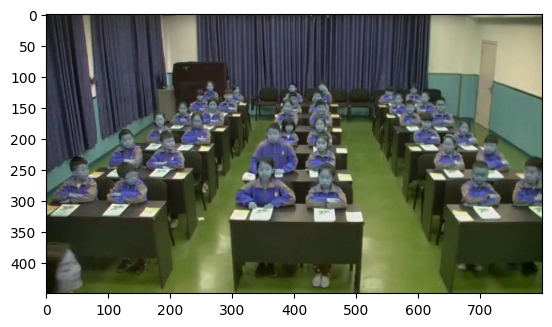

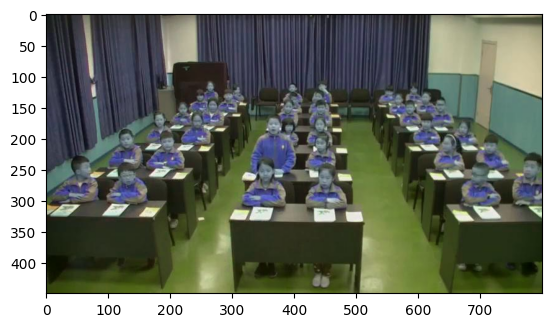

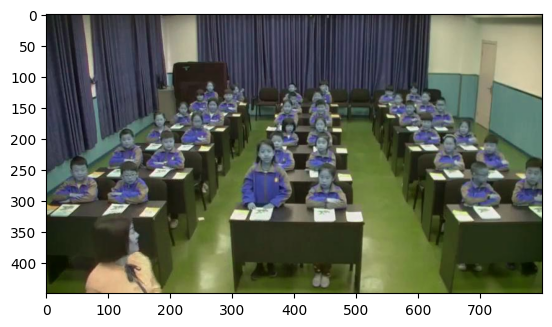

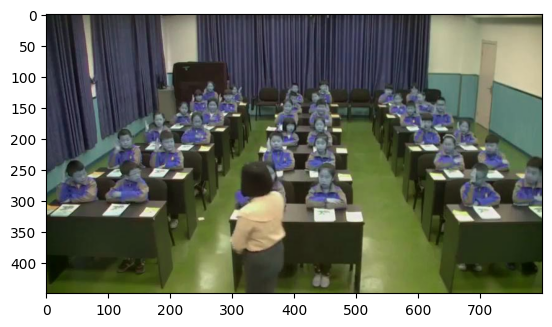

In [2]:
import cv2
import matplotlib.pyplot as plt

#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(base_dir, "train"))):
    img = cv2.imread(os.path.join(base_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [3]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [21]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/70_model_direct/yolov8_trained_model.pt')

In [16]:
from ultralytics import YOLO
import os
os.makedirs('/content/drive/MyDrive/70_model_direct', exist_ok=True)


model = YOLO('yolov8n.pt')

#model.tune(data="coco8.yaml", epochs=30, iterations=300, optimizer="AdamW", imgsz=640)

model.train(
    data='/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml',
     epochs=70 ,
     lr0=0.001 ,
     batch = 16,
     imgsz=640,

)

model.save('/content/drive/MyDrive/70_model_direct/yolov8_trained_model.pt')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/train.cache... 330 images, 0 backgrounds, 0 corrupt: 100%|██████████| 330/330 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/141.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/186.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/223.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75       4.3G      1.577      2.447      1.208        650        640: 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


                   all        230       6366     0.0901      0.977      0.803      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      3.41G      1.045     0.8304     0.9357        504        640: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]


                   all        230       6366      0.846      0.553      0.693      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      3.32G     0.9221     0.6817     0.9006        505        640: 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        230       6366      0.799      0.718      0.795      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      3.22G      0.863     0.6327     0.8868        535        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


                   all        230       6366      0.793      0.388      0.529      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      2.99G     0.8678     0.6194     0.8975        613        640: 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]


                   all        230       6366       0.82      0.372       0.48      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      3.13G       0.93      0.623     0.9083        622        640: 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]


                   all        230       6366       0.75      0.374      0.481      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      3.63G     0.8114      0.572     0.8775        747        640: 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        230       6366      0.748      0.424      0.544      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      3.47G     0.7649     0.5513     0.8709        552        640: 100%|██████████| 21/21 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]


                   all        230       6366      0.704      0.443      0.569      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      3.17G     0.7666      0.532     0.8636        685        640: 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]

                   all        230       6366      0.749      0.338      0.435      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      3.27G     0.7335     0.5195     0.8661        591        640: 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        230       6366      0.803      0.311      0.402      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75       3.1G     0.7616     0.5122      0.866        552        640: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]


                   all        230       6366      0.655       0.34      0.449       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75         3G     0.7036     0.4861     0.8584        487        640: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        230       6366      0.656      0.532      0.631      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      3.22G     0.6953     0.4798     0.8541        691        640: 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


                   all        230       6366       0.71      0.408      0.519      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      3.28G     0.6895     0.4716     0.8548        583        640: 100%|██████████| 21/21 [00:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]

                   all        230       6366      0.666      0.457      0.558      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      3.37G     0.6814      0.459     0.8546        625        640: 100%|██████████| 21/21 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        230       6366      0.759       0.51      0.616      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      3.13G     0.7169     0.4605     0.8534        585        640: 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]


                   all        230       6366       0.68      0.367      0.425      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75       3.2G      0.704     0.4593     0.8557        573        640: 100%|██████████| 21/21 [00:08<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


                   all        230       6366      0.779      0.572      0.683      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      3.32G     0.6821     0.4428     0.8501        474        640: 100%|██████████| 21/21 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        230       6366      0.678      0.478      0.569      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      2.84G     0.6601       0.44     0.8448        599        640: 100%|██████████| 21/21 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


                   all        230       6366      0.764      0.373       0.44      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      3.52G     0.6548     0.4422     0.8483        367        640: 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]


                   all        230       6366      0.748      0.351      0.418      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      3.35G     0.6655     0.4371     0.8448        547        640: 100%|██████████| 21/21 [00:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        230       6366      0.643      0.433      0.518      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      3.39G     0.6495     0.4206     0.8424        534        640: 100%|██████████| 21/21 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]


                   all        230       6366      0.681      0.635      0.712      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      2.77G     0.6439     0.4186      0.843        597        640: 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        230       6366      0.687      0.431      0.508      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      3.08G     0.6482     0.4198     0.8435        577        640: 100%|██████████| 21/21 [00:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        230       6366      0.667      0.424      0.537      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      3.65G     0.6563     0.4154     0.8434        601        640: 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        230       6366      0.867       0.33      0.396      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      3.39G     0.6401     0.4102     0.8395        565        640: 100%|██████████| 21/21 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        230       6366      0.758      0.386      0.504      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      2.94G     0.6372     0.4095     0.8417        526        640: 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


                   all        230       6366      0.754      0.504      0.612      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      3.22G      0.649     0.4027     0.8384        531        640: 100%|██████████| 21/21 [00:06<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]


                   all        230       6366      0.671      0.444      0.526      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      3.25G     0.6395     0.4004     0.8419        556        640: 100%|██████████| 21/21 [00:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]


                   all        230       6366      0.633      0.424      0.517       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      2.75G     0.6378     0.3984     0.8398        559        640: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        230       6366      0.844      0.335      0.476      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      3.73G     0.6164     0.3919     0.8367        632        640: 100%|██████████| 21/21 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        230       6366      0.691      0.387      0.481      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      3.25G     0.6279     0.3957     0.8383        453        640: 100%|██████████| 21/21 [00:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]


                   all        230       6366      0.649      0.441      0.521      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      3.17G     0.6134     0.3853     0.8322        795        640: 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


                   all        230       6366      0.678      0.381      0.472      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      3.01G     0.6007     0.3761      0.831        619        640: 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        230       6366      0.738       0.35      0.449      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      3.33G     0.6223     0.3831     0.8409        486        640: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]


                   all        230       6366      0.706      0.359      0.474      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      3.51G     0.6167     0.3763     0.8375        479        640: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        230       6366      0.649       0.57      0.637      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75       2.9G     0.6063     0.3762     0.8343        592        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        230       6366       0.68      0.368       0.47      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      4.03G     0.6093      0.375     0.8348        557        640: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]


                   all        230       6366      0.818      0.332      0.433      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      3.64G     0.6135     0.3734     0.8355        598        640: 100%|██████████| 21/21 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        230       6366      0.693      0.386       0.49      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      3.73G     0.5905     0.3683      0.836        452        640: 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]

                   all        230       6366      0.665      0.381      0.472      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      3.28G      0.582     0.3582     0.8257        728        640: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


                   all        230       6366      0.848      0.352      0.456      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      3.47G     0.5895     0.3654     0.8296        563        640: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        230       6366      0.626      0.444      0.512      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      3.38G     0.5897     0.3628     0.8334        541        640: 100%|██████████| 21/21 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        230       6366      0.783      0.363      0.457      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      3.25G     0.5849      0.363     0.8328        484        640: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        230       6366      0.706       0.36      0.436      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      3.13G     0.5862     0.3602     0.8286        509        640: 100%|██████████| 21/21 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]


                   all        230       6366      0.727      0.372      0.453      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      3.16G     0.5765     0.3523     0.8279        468        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        230       6366      0.693      0.349        0.4      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      3.28G     0.5898      0.359     0.8311        729        640: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]


                   all        230       6366      0.727      0.366       0.46      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      3.42G     0.5851     0.3552     0.8295        794        640: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


                   all        230       6366      0.651      0.397      0.488       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      3.53G     0.5664     0.3488     0.8278        644        640: 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        230       6366      0.641      0.427      0.508      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75       3.1G     0.5756     0.3476     0.8307        586        640: 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        230       6366      0.696      0.346      0.418      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      3.37G     0.5744     0.3493     0.8285        506        640: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]


                   all        230       6366      0.795      0.306      0.383        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      3.93G     0.5694     0.3434     0.8241        647        640: 100%|██████████| 21/21 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        230       6366      0.836       0.31      0.385        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      3.48G     0.5687     0.3428     0.8293        567        640: 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all        230       6366       0.71      0.347      0.417      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      3.57G     0.5742     0.3454     0.8315        455        640: 100%|██████████| 21/21 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        230       6366      0.689      0.367      0.453      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      2.98G     0.5714     0.3465     0.8302        463        640: 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        230       6366       0.75      0.369      0.479      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      3.69G      0.551      0.337     0.8254        430        640: 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


                   all        230       6366      0.859      0.322      0.423      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      3.23G     0.5564     0.3415     0.8231        591        640: 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        230       6366      0.678      0.366      0.459      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      3.01G     0.5605     0.3386     0.8241        542        640: 100%|██████████| 21/21 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        230       6366      0.656      0.404      0.488      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75       3.5G     0.5444     0.3308     0.8209        614        640: 100%|██████████| 21/21 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all        230       6366      0.655      0.409      0.496      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      3.46G     0.5536     0.3312     0.8236        540        640: 100%|██████████| 21/21 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


                   all        230       6366      0.693      0.353      0.423      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      3.15G     0.5469     0.3295     0.8245        422        640: 100%|██████████| 21/21 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]


                   all        230       6366      0.876      0.313      0.372      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      3.28G     0.5433     0.3275     0.8234        418        640: 100%|██████████| 21/21 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]

                   all        230       6366      0.862      0.302      0.344      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      3.74G      0.549     0.3259     0.8224        462        640: 100%|██████████| 21/21 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all        230       6366      0.868      0.304      0.368      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      3.44G     0.5572     0.3324     0.8228        592        640: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        230       6366      0.835      0.324      0.418      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75       3.8G     0.5433     0.3253     0.8239        520        640: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


                   all        230       6366      0.703      0.364       0.47       0.35
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75       2.6G     0.5377     0.3292     0.8231        335        640: 100%|██████████| 21/21 [00:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        230       6366      0.741      0.353      0.435      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      2.32G     0.5302     0.3206     0.8186        307        640: 100%|██████████| 21/21 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        230       6366      0.683      0.406      0.512      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      2.32G     0.5289     0.3171     0.8204        309        640: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


                   all        230       6366      0.631      0.508       0.57      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      2.25G     0.5288     0.3173      0.821        257        640: 100%|██████████| 21/21 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        230       6366      0.648      0.501      0.577      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      2.32G     0.5169     0.3107     0.8184        249        640: 100%|██████████| 21/21 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]

                   all        230       6366      0.705      0.419      0.519      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      2.25G     0.5184     0.3093     0.8174        298        640: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        230       6366      0.699      0.402      0.504      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      2.32G     0.5148     0.3076     0.8172        274        640: 100%|██████████| 21/21 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]


                   all        230       6366      0.743      0.363      0.456      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      2.32G     0.5083     0.3041     0.8184        330        640: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        230       6366      0.803      0.345      0.435      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      2.32G     0.5114     0.3035     0.8157        241        640: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]


                   all        230       6366      0.757      0.354      0.452      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      2.31G     0.5104     0.3047     0.8142        305        640: 100%|██████████| 21/21 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]


                   all        230       6366      0.782       0.35      0.452      0.336

75 epochs completed in 0.272 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]


                   all        230       6366     0.0902      0.977      0.804      0.479
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
# from ultralytics import YOLO

# model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')

In [17]:
#model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]


                   all        230       6366     0.0901      0.976      0.803      0.478
Speed: 0.4ms preprocess, 4.8ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train62


0.9764373232799246

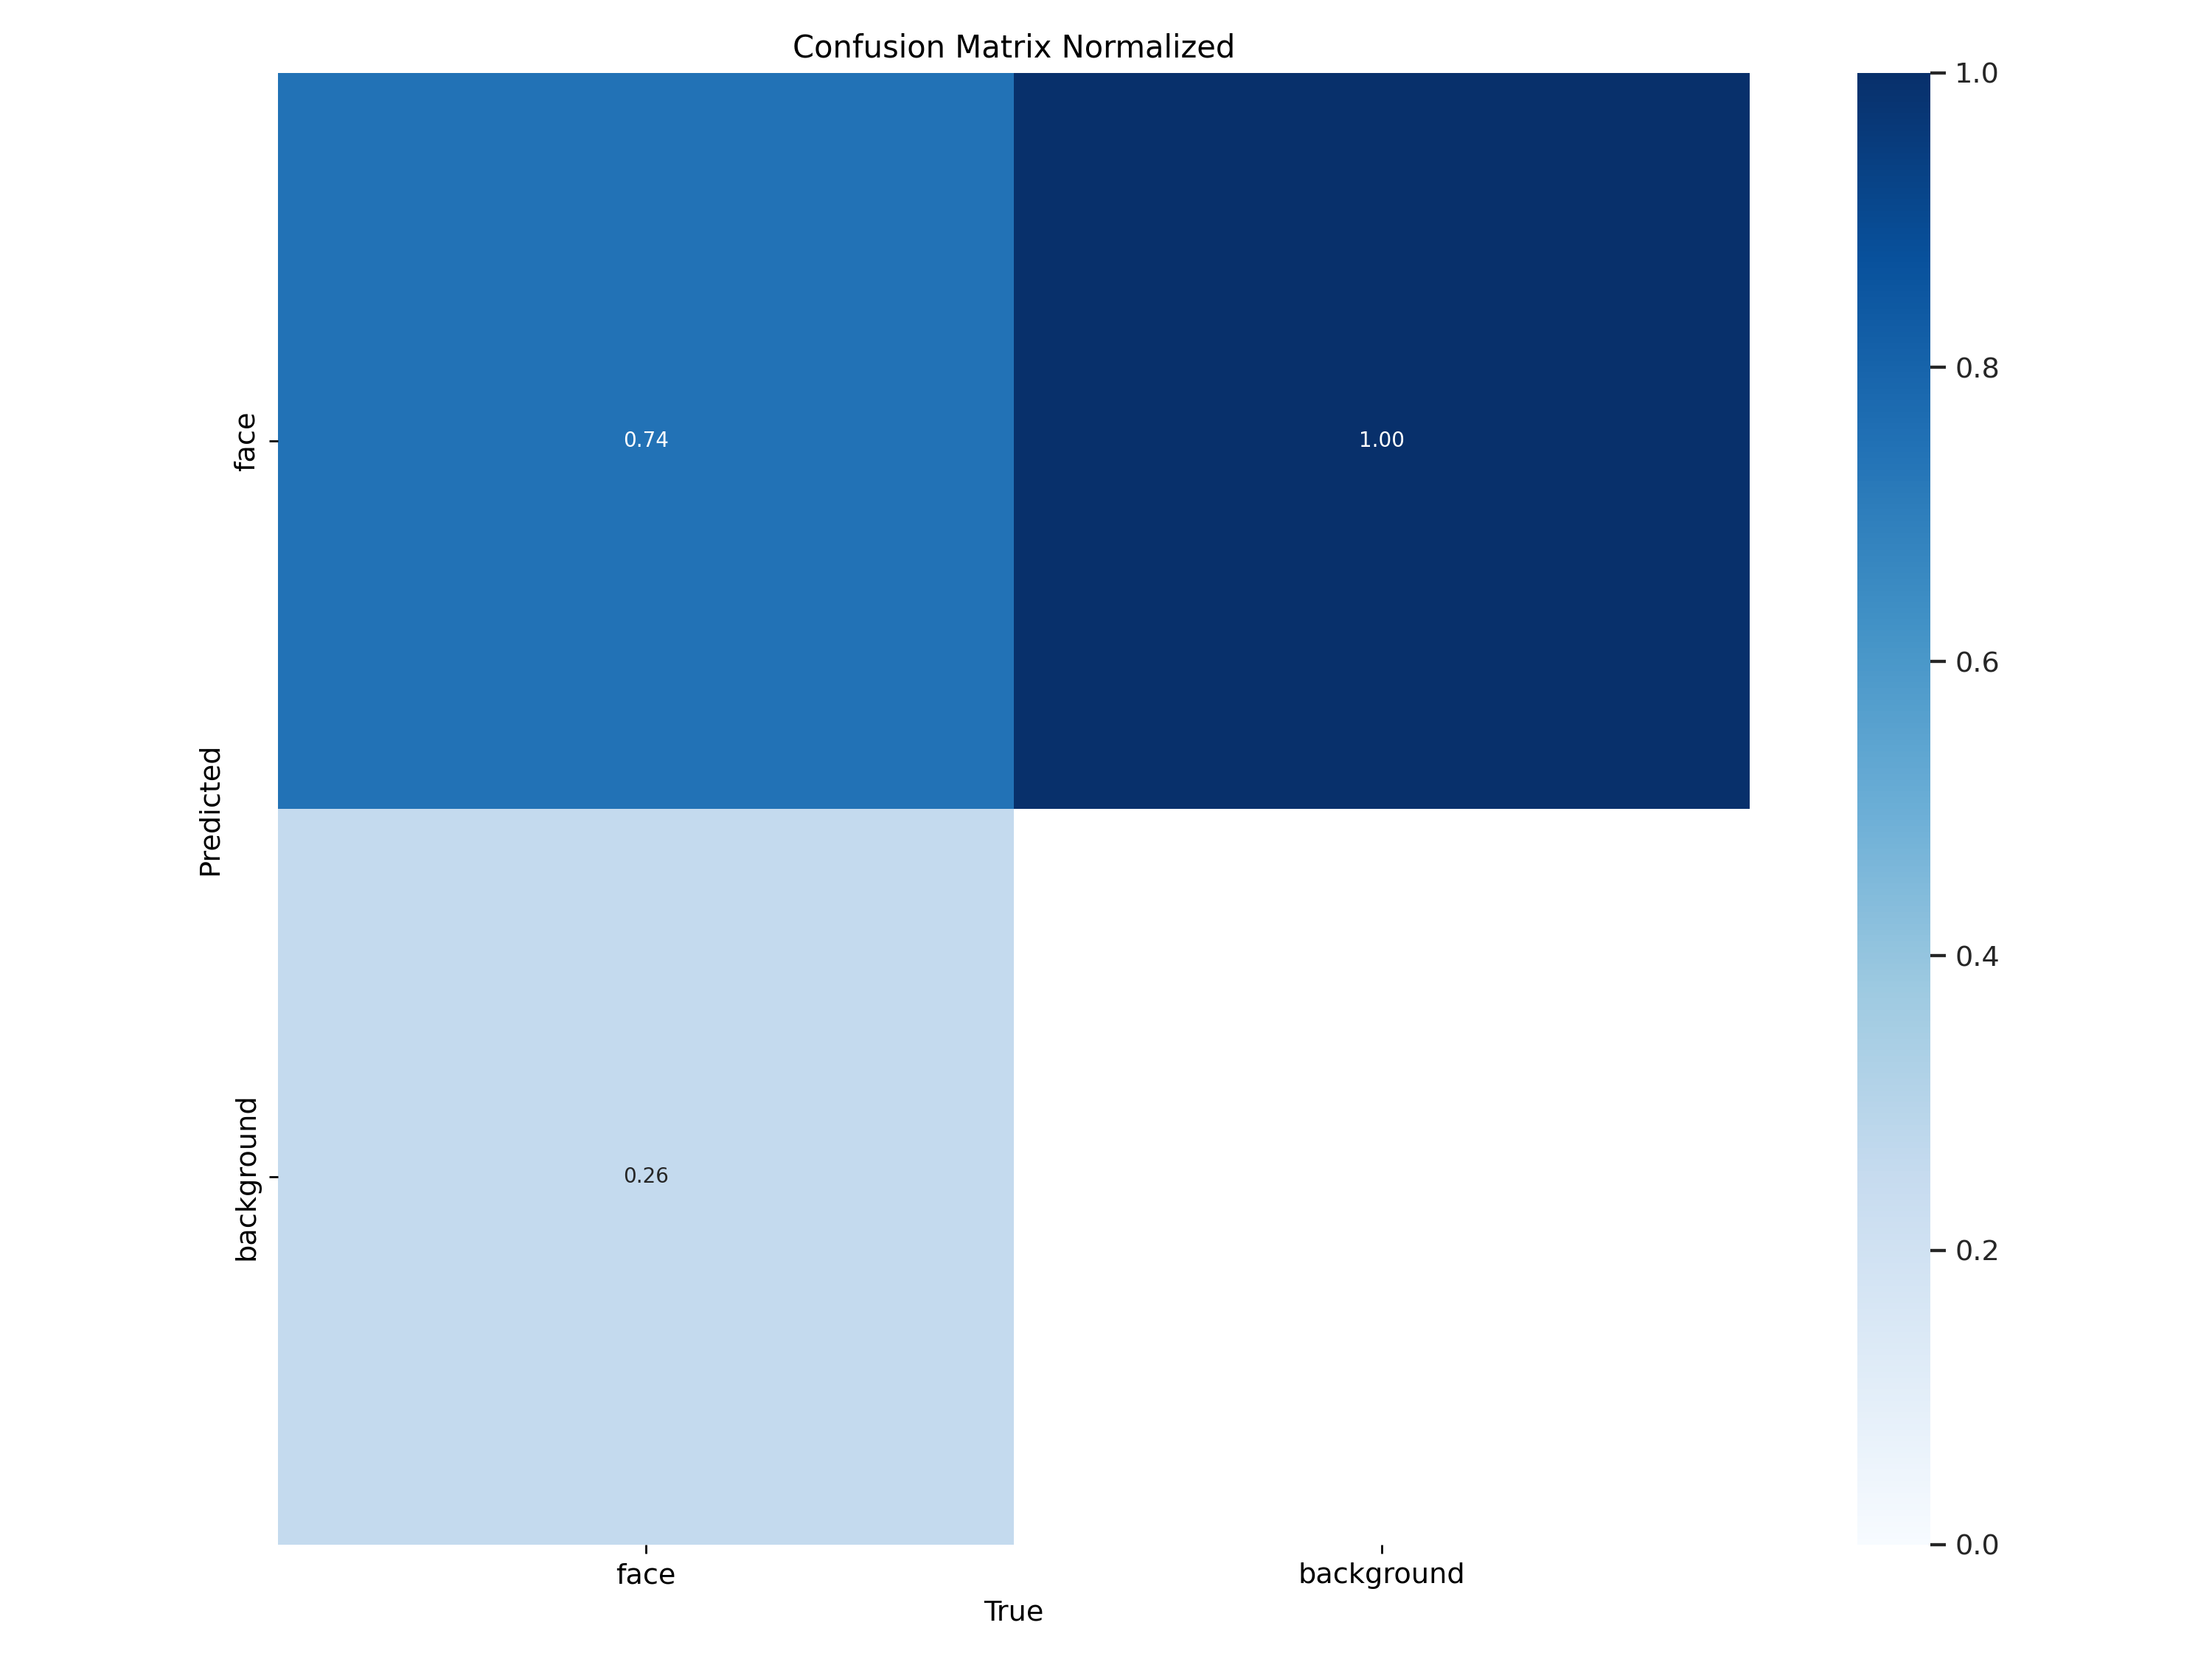

In [23]:
 # 70_epochs
 %matplotlib inline
 from PIL import Image

 Image.open('/content/runs/detect/train42/confusion_matrix_normalized.png')

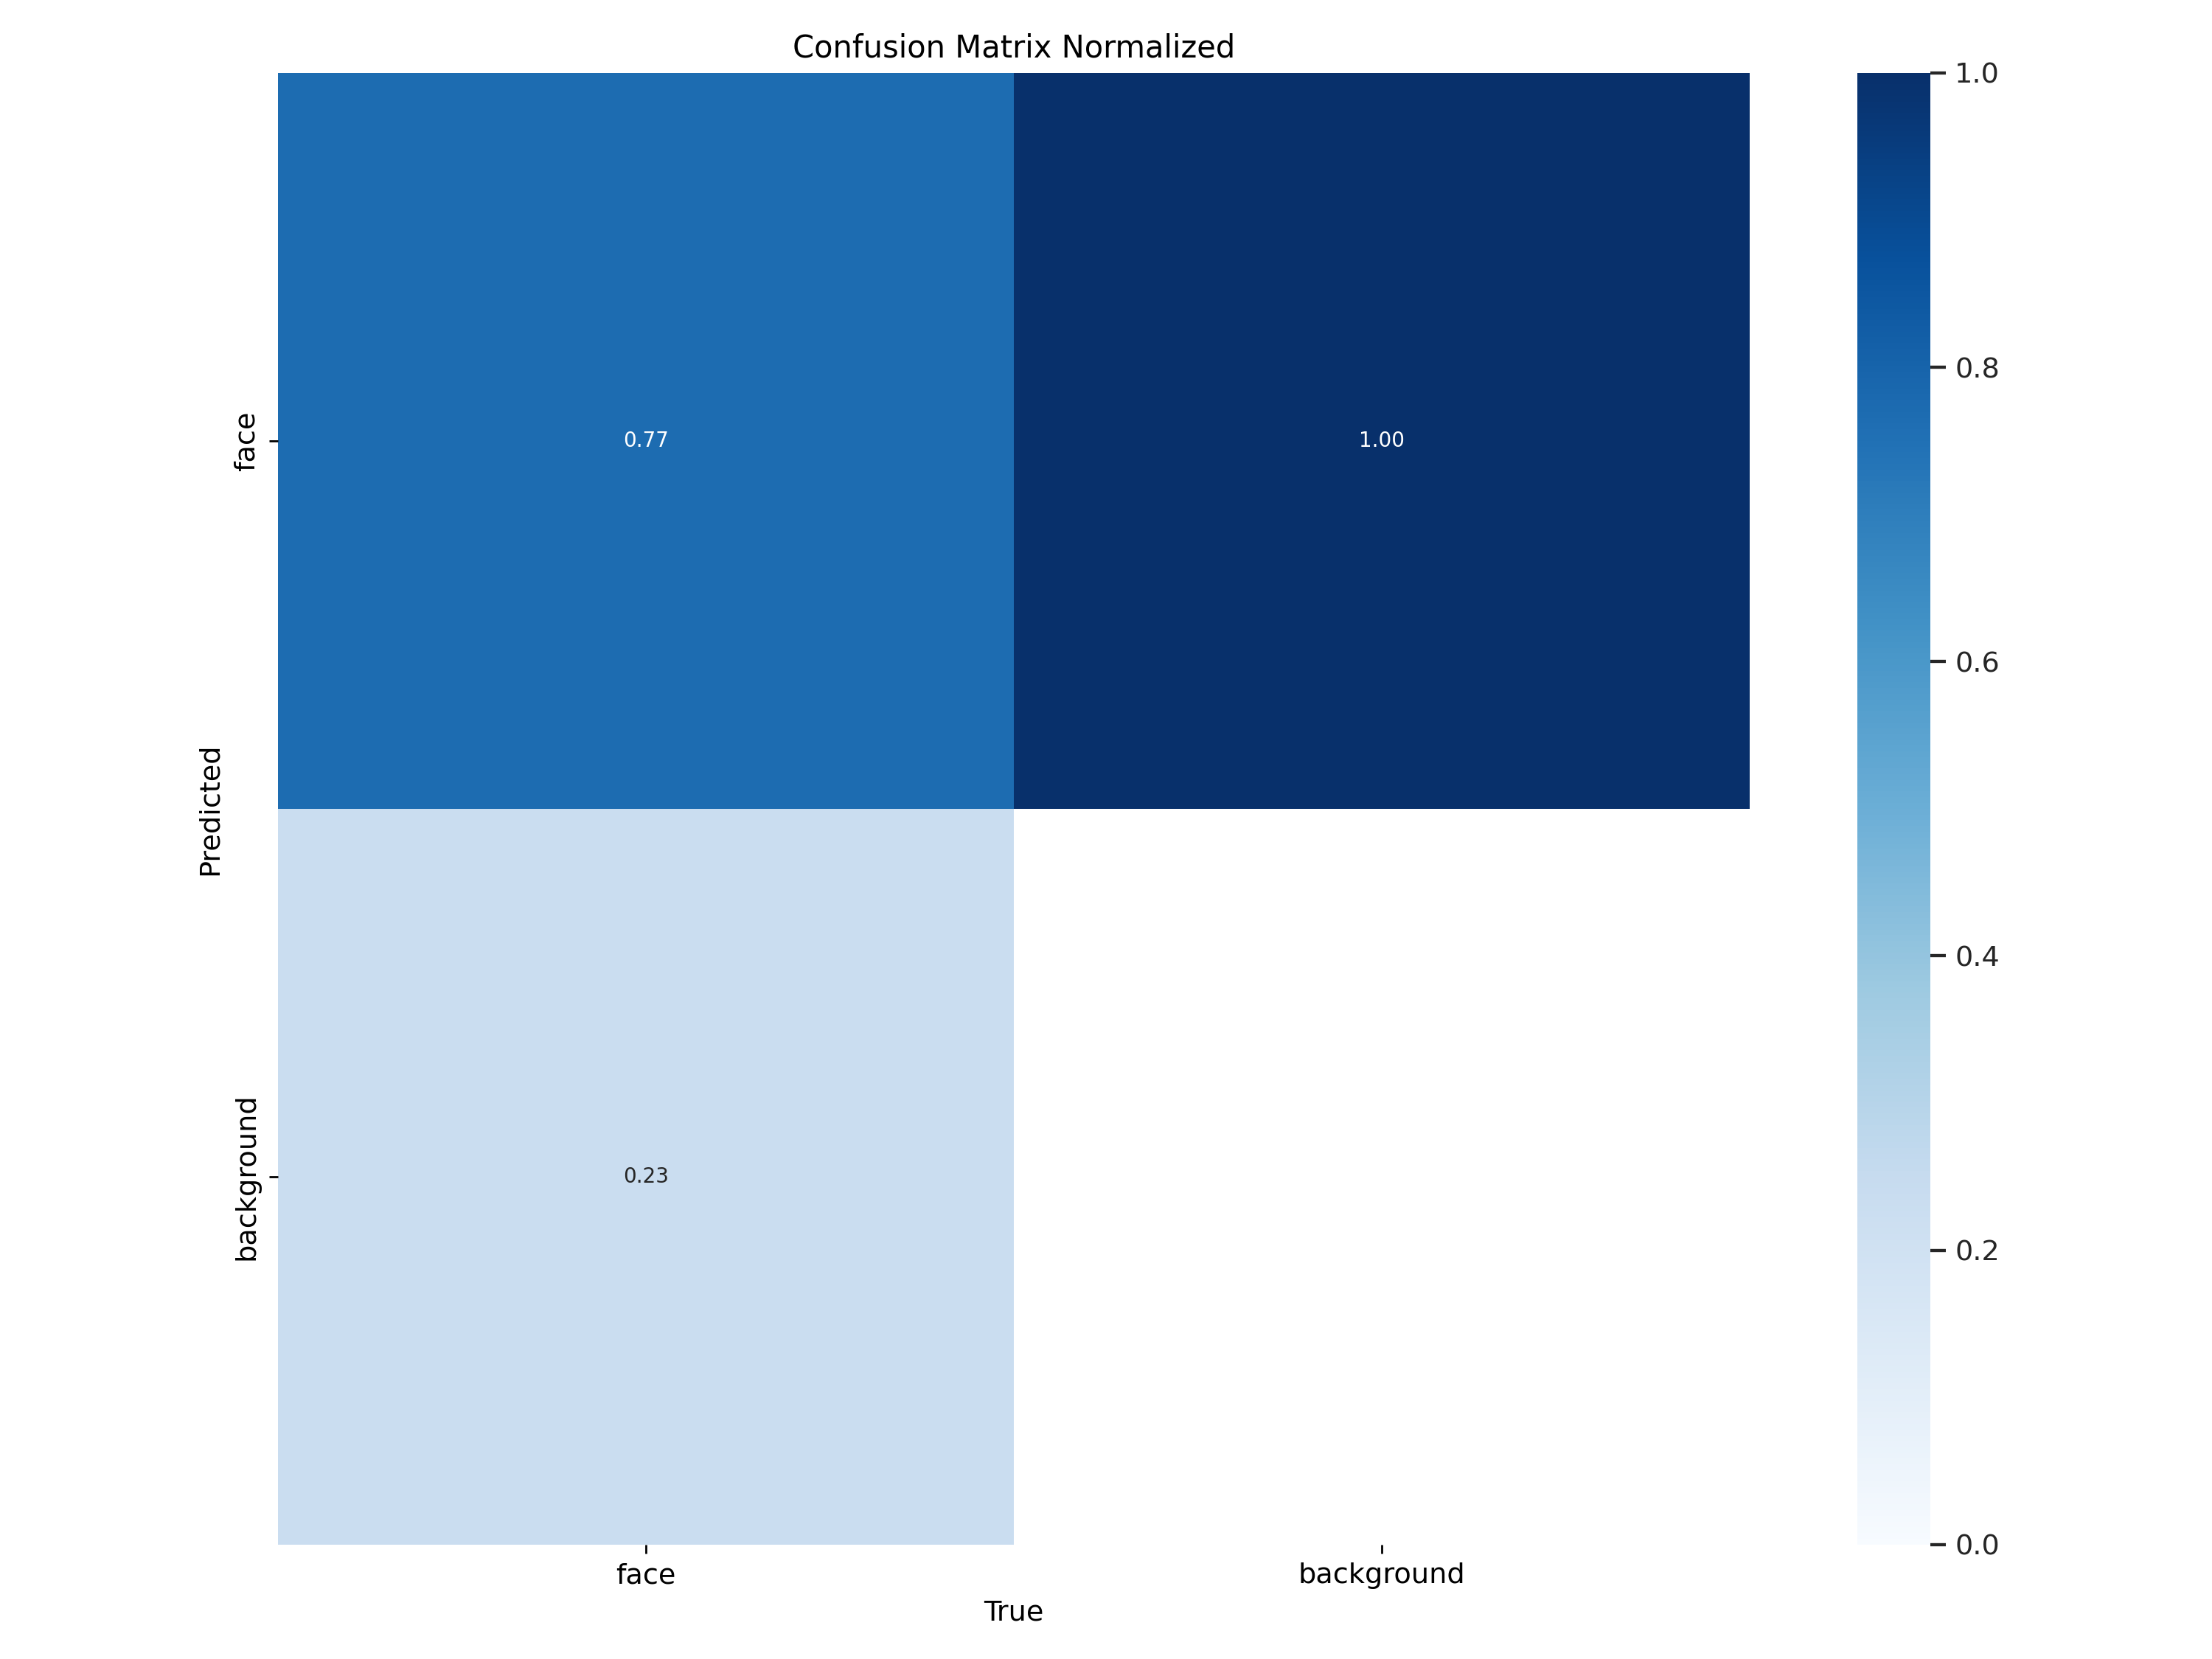

In [8]:
# # 100_epochs
# %matplotlib inline
# from PIL import Image

# Image.open('/content/runs/detect/train22/confusion_matrix_normalized.png')

In [ ]:
# #30_epochs
# %matplotlib inline
# from PIL import Image

# Image.open('/content/runs/detect/train6/confusion_matrix_normalized.png')

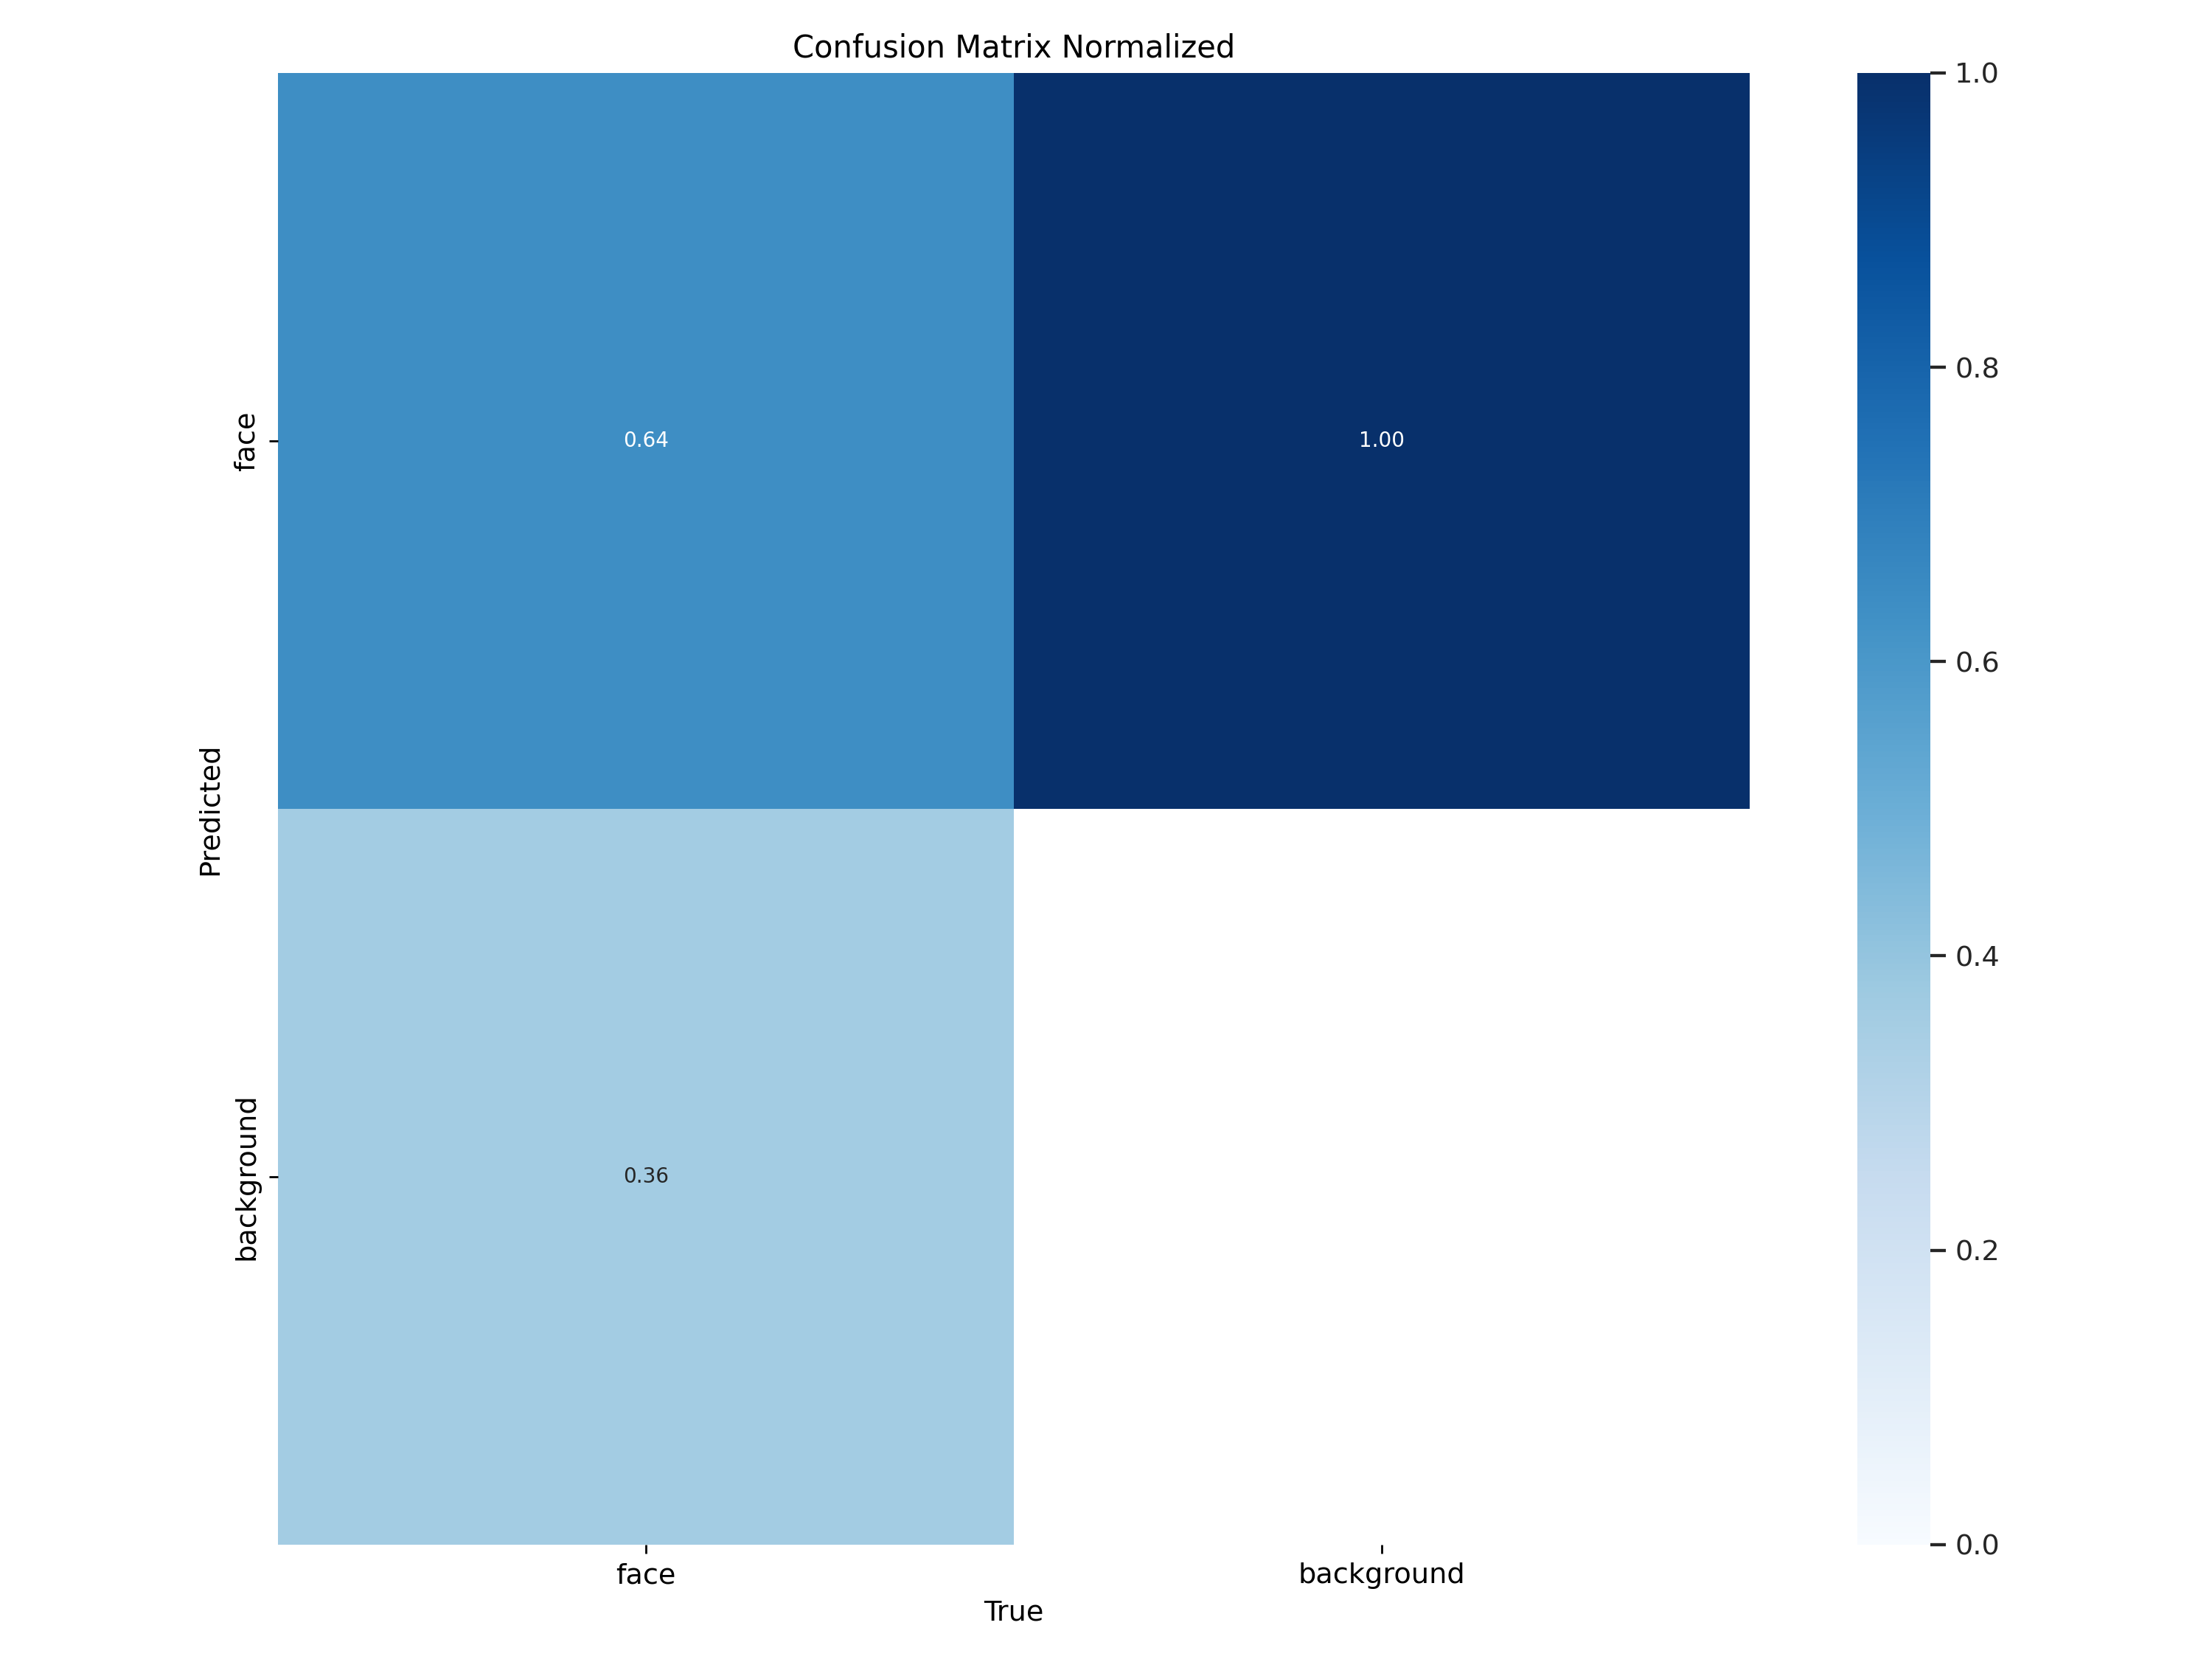

In [ ]:
# %matplotlib inline
# from PIL import Image

# Image.open('/content/runs/detect/train42/confusion_matrix_normalized.png')


Found https://p5.itc.cn/images01/20231123/5153d120e85d412b8dc827b104668d12.jpeg locally at 5153d120e85d412b8dc827b104668d12.jpeg
image 1/1 /content/5153d120e85d412b8dc827b104668d12.jpeg: 608x640 17 faces, 13.4ms
Speed: 4.2ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 640)
Number of detected faces: 17


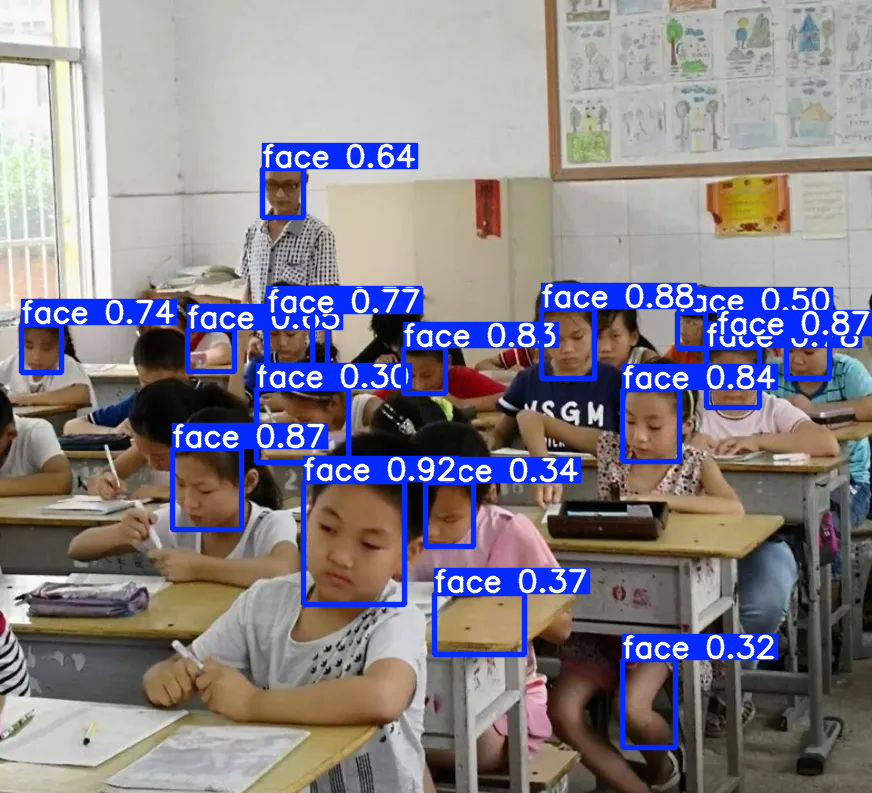

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

imagePath = 'https://p5.itc.cn/images01/20231123/5153d120e85d412b8dc827b104668d12.jpeg'

results = model.predict(source=imagePath)

face_count = 0
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image
    face_count += len(r.boxes.xyxy)

print("Number of detected faces:", face_count)

#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)